In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [6]:
# importing the iris data
iris_data = load_iris()
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# for simplicity, we would do classification only on 2 features that is petal width and lenght
# dropping the sepal featues

data.drop(["sepal length (cm)", "sepal width (cm)"], axis=1, inplace=True)
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


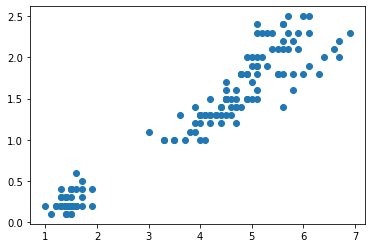

In [9]:
# lets try plotiing the data without scaling

plt.scatter(data.iloc[:,0], data.iloc[:,1])
# or we can use --- plt.scatter(data["petal length (cm)"], data["petal width (cm)"])

In [11]:
# lets use the kmeans to get the clusters
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
prediction = model.fit_predict(data)

prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# lets add this prediction to our data
data["prediction"] = prediction
data.head()

,petal length (cm),petal width (cm),prediction
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


Text(0, 0.5, 'petal width (cm)')

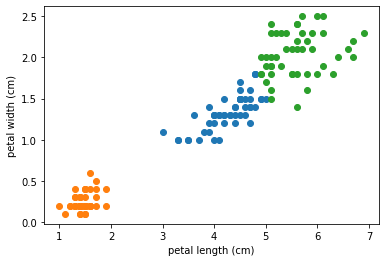

In [13]:
# lets make a scatter plot to see the clustering

df1 = data[data.prediction == 0]
df2 = data[data.prediction == 1]
df3 = data[data.prediction == 2]

plt.scatter(df1.iloc[:,0], df1.iloc[:,1])
plt.scatter(df2.iloc[:,0], df2.iloc[:,1])
plt.scatter(df3.iloc[:,0], df3.iloc[:,1])

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

<h1>Elbow Plot</h1>

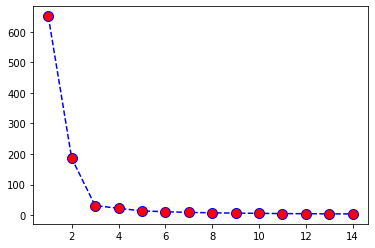

In [14]:
# now lets calculate the sum of squared error to plot the elbow graph

sum_squared_errors = []

for k in range(1,15):
    model = KMeans(n_clusters=k)
    model.fit(data)
    sum_squared_errors.append(model.inertia_)


plt.plot( range(1,15) , sum_squared_errors, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [ ]:
# here 3 is the elbow point so 3 is the optimal value for k